In [1]:
# Imports for JupyterLite
%pip install -q ipywidgets
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Upload a test dataset (Optional)

In [2]:
import ipywidgets as widgets

# from ipywidgets import FileUpload
# upload = FileUpload(accept='.csv', multiple=False) # Example: restrict to CSV and single file
# display(upload)
# After a file is uploaded, access its data:
# if upload.value:
#     uploaded_file_data = upload.value[0]['content']

# from IPython.display import display

# uploader = FileUpload(
#     accept='.txt,.csv',  # Accepted file types
#     multiple=False  # Allow multiple files
# )
# display(uploader)

file = widgets.FileUpload(
    description= 'Upload dataset',
    accept='.txt,.csv',
    multiple=False,
)
# box = widgets.HBox([file])
file
display(file)

# New Cell

# print(str(file))

FileUpload(value=(), accept='.txt,.csv', description='Upload dataset')

In [3]:
print(file.value)
# print(file.content)
if file.value:
    file = file.value[0]
    test1 = pd.read_csv("./input.txt", header=None)
    test1.head(5)
# file.content.tobytes()

# Create file
# with open("./input.txt", "wb") as fp:
#     fp.write(file.content)
    
# test1 = pd.read_csv("./input.txt")



()


In [4]:
## Choose dataset from folder (Optional)

In [5]:
import os
import pandas as pd
import ipywidgets as widgets

# NSL-KDD Datasets from:
# Wong, J. (2020, December 26). jmnwong/NSL-KDD-Dataset. GitHub.
 	# https://github.com/jmnwong/NSL-KDD-Dataset

folder_list = os.listdir("./data/NSL-KDD-Dataset") # Replace with the actual path
print(f"Contents of the folder: {folder_list}")

# Filter non- .txt and .csv files
import re
full_list = folder_list
regex = re.compile(r".*\.(txt|csv)$")

filtered_folder_list = [i for i in full_list if regex.match(i)]
print(filtered_folder_list)

filtered_folder_list.insert(0,'Choose a dataset below')

print(type(filtered_folder_list))

db_list = widgets.Dropdown(
    options=filtered_folder_list,
    # value=folder_list[0],
    value=filtered_folder_list[0],
    description='Dataset: ',
    disabled=False,

)

test2=pd.DataFrame()



# Define the callback function to log the selection
def on_dropdown_change(change):
    global test2
    if change['name'] == 'value':  # Ensure the change is for the 'value' attribute
        path_string = f"./data/NSL-KDD-Dataset/{db_list.value}"
        test2=pd.read_csv(path_string, header=None)
        print(f"Selected: {change['new']}")
        print('value', db_list.value)
        print('UPDATED path_string',path_string)



button = widgets.Button(
    description='Preview dataset in console',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Preview dataset',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)



def button_change(change):
    
    print('test2',test2)

    # with output_widget:
    #     clear_output()  # Clear previous output
    #     print(f"The variable value is: {test2}")
    
button

# Attach the callback function to the dropdown's value changes
db_list.observe(on_dropdown_change, names='value')

button.on_click(button_change)


display(db_list)
display(button)

Contents of the folder: ['test-csv.csv', '.ipynb_checkpoints', 'KDDTest+.txt', 'README.md', 'KDDTest-21.txt', 'KDDTrain+.txt', 'KDDTrain+_20Percent.txt']
['test-csv.csv', 'KDDTest+.txt', 'KDDTest-21.txt', 'KDDTrain+.txt', 'KDDTrain+_20Percent.txt']
<class 'list'>


Dropdown(description='Dataset: ', options=('Choose a dataset below', 'test-csv.csv', 'KDDTest+.txt', 'KDDTest-…

Button(button_style='success', description='Preview dataset in console', icon='check', style=ButtonStyle(), to…

In [6]:
print(test2)

Empty DataFrame
Columns: []
Index: []


In [7]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb

data_dir = "./data/NSL-KDD-Dataset/"

data_training = pd.read_csv(f"{data_dir}/KDDTrain+.txt", header=None)
data_test = pd.read_csv(f"{data_dir}/KDDTest+.txt", header=None)


##### Testing 
# data_test = test2
#####

dt = data_training
dtest = data_test

#Adding Column Headers
columns = ([
			'duration',
			'protocol_type',
			'service',
			'flag',
			'src_bytes',
			'dst_bytes',
			'land',
			'wrong_fragment',
			'urgent',
			'hot',
			'num_failed_logins',
			'logged_in',
			'num_compromised',
			'root_shell',
			'su_attempted',
			'num_root',
			'num_file_creations',
			'num_shells',
			'num_access_files',
			'num_outbound_cmds',
			'is_host_login',
			'is_guest_login',
			'count',
			'srv_count',
			'serror_rate',
			'srv_serror_rate',
			'rerror_rate',
			'srv_rerror_rate',
			'same_srv_rate',
			'diff_srv_rate',
			'srv_diff_host_rate',
			'dst_host_count',
			'dst_host_srv_count',
			'dst_host_same_srv_rate',
			'dst_host_diff_srv_rate',
			'dst_host_same_src_port_rate',
			'dst_host_srv_diff_host_rate',
			'dst_host_serror_rate',
			'dst_host_srv_serror_rate',
			'dst_host_rerror_rate',
			'dst_host_srv_rerror_rate',
			'attack',
			'level'
		])


dt.columns = columns
dtest.columns = columns


# meta-summary
# data_training.info()
# print(data_training.head(5))

dt.head(5)

# Data general statistics
dt.describe().T

#Check for null values in dataset
# dt.isnull().sum()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [8]:
import pandas
# from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', None)
dt.head(10)

# scatter_matrix(dt)
# dt.hist()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [9]:

dt = data_training

# Frequency Table of attack compared with protocol_type
attack_vs_protocol = pd.crosstab(dt.attack, dt.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


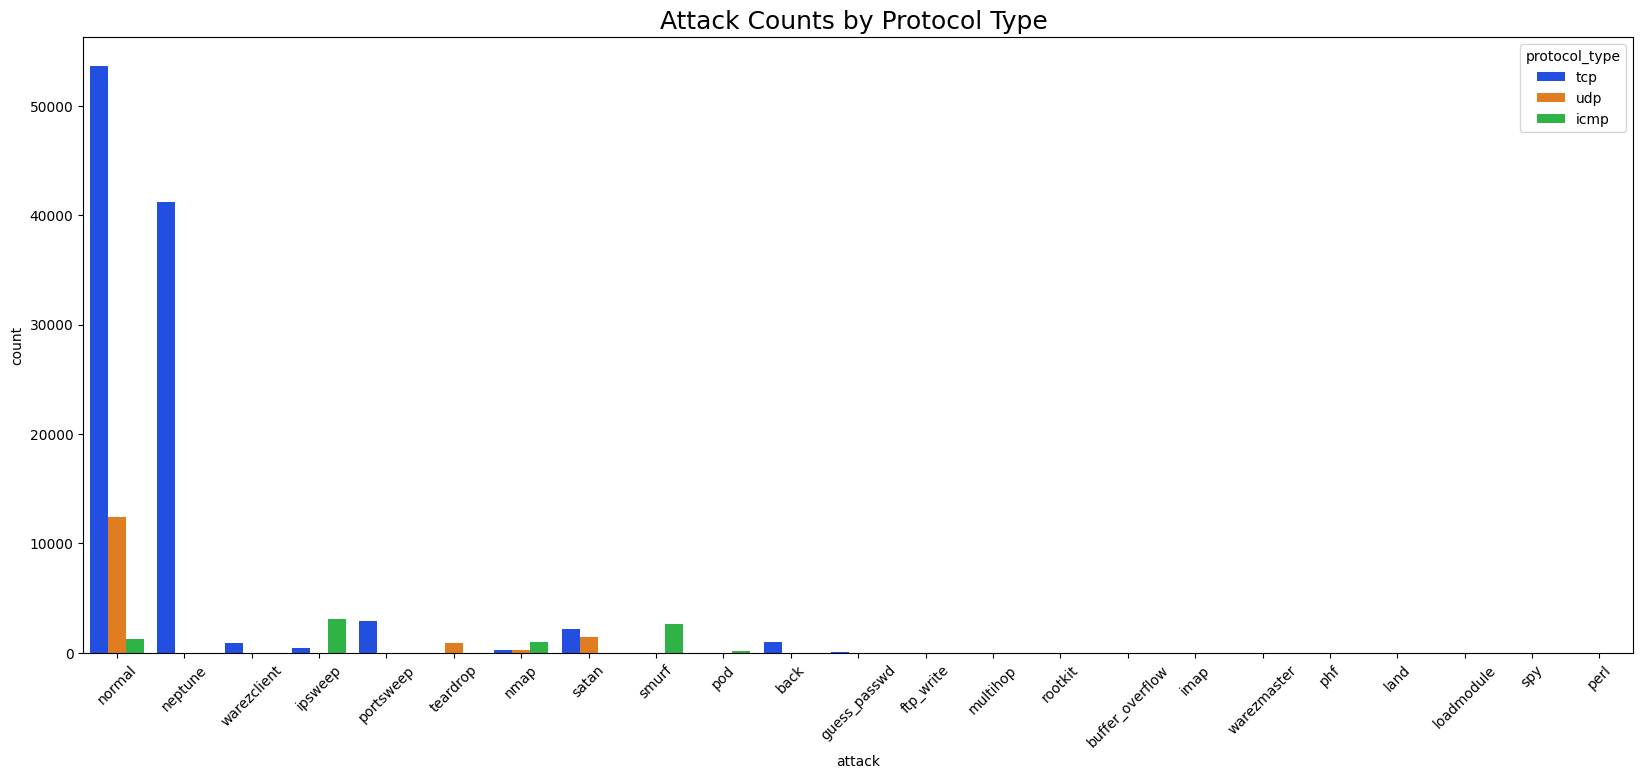

In [10]:

mplot.figure(figsize=(20,8))

#All Data
sb.countplot(x='attack',data=dt,hue='protocol_type',palette='bright')

#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
# sb.countplot(x='attack',data=dt_normal_filtered,hue='protocol_type')

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='bright')

mplot.xticks(rotation=45)
mplot.title('Attack Counts by Protocol Type ',fontdict={'fontsize':18})
mplot.show()

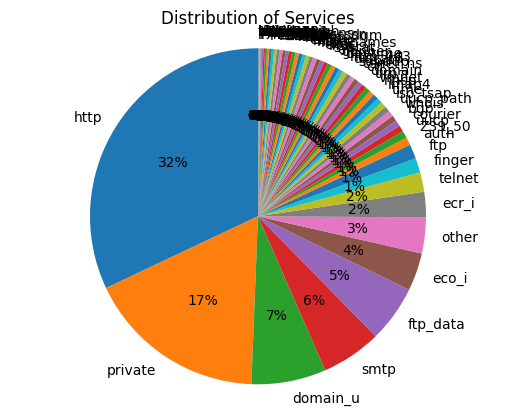

In [11]:
import pandas as pd

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])

dt_onlynormal_filtered = dt[dt['attack']=='normal']
data = pd.Series(dt['service'].value_counts())


# print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.0f%%', startangle=90)
mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Services')
mplot.show()

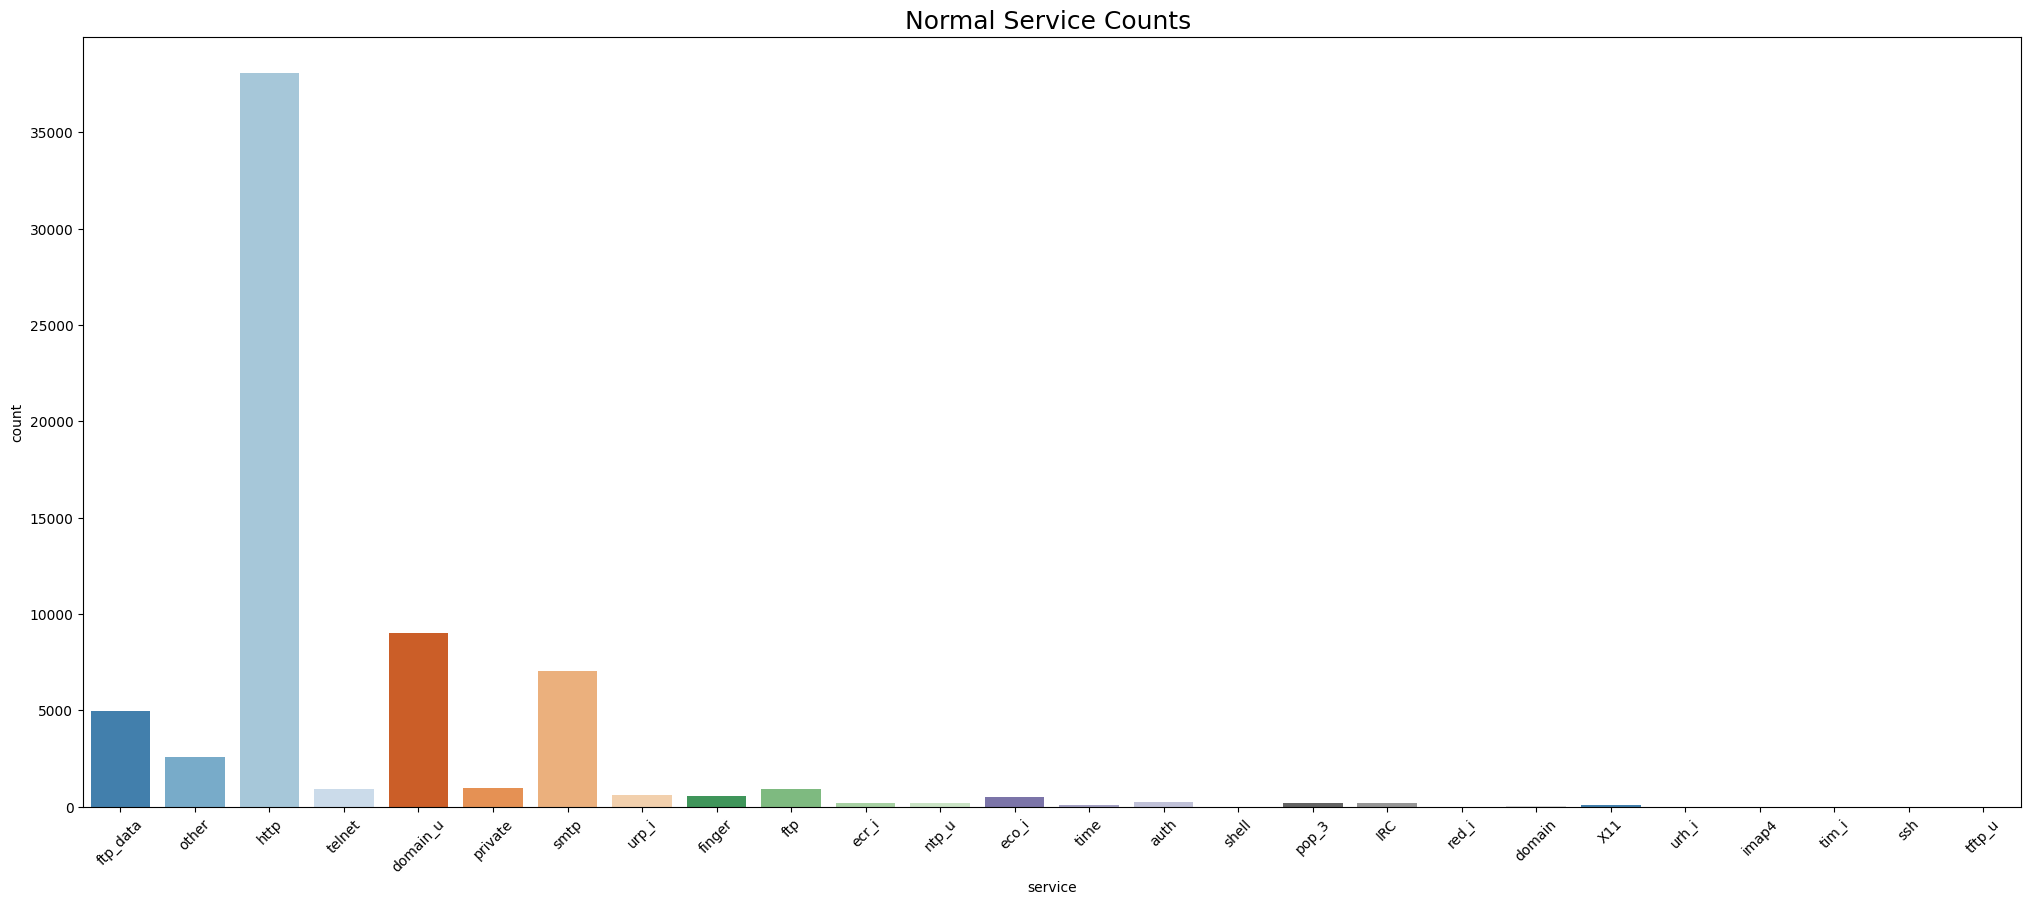

In [12]:
import seaborn as sb
import matplotlib.pyplot as mplot


mplot.figure(figsize=(25,10))

#All Data
# sb.countplot(x='service',data=dt)

#Only 'normal'
dt_onlynormal_filtered = dt[dt['attack']=='normal']
sb.countplot(x='service',data=dt_onlynormal_filtered, hue='service', palette='tab20c')
          
#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
# sb.countplot(x='service',data=dt_normal_filtered)

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='pastel')

mplot.xticks(rotation=45)
mplot.title('Normal Service Counts ',fontdict={'fontsize':18})
mplot.show()

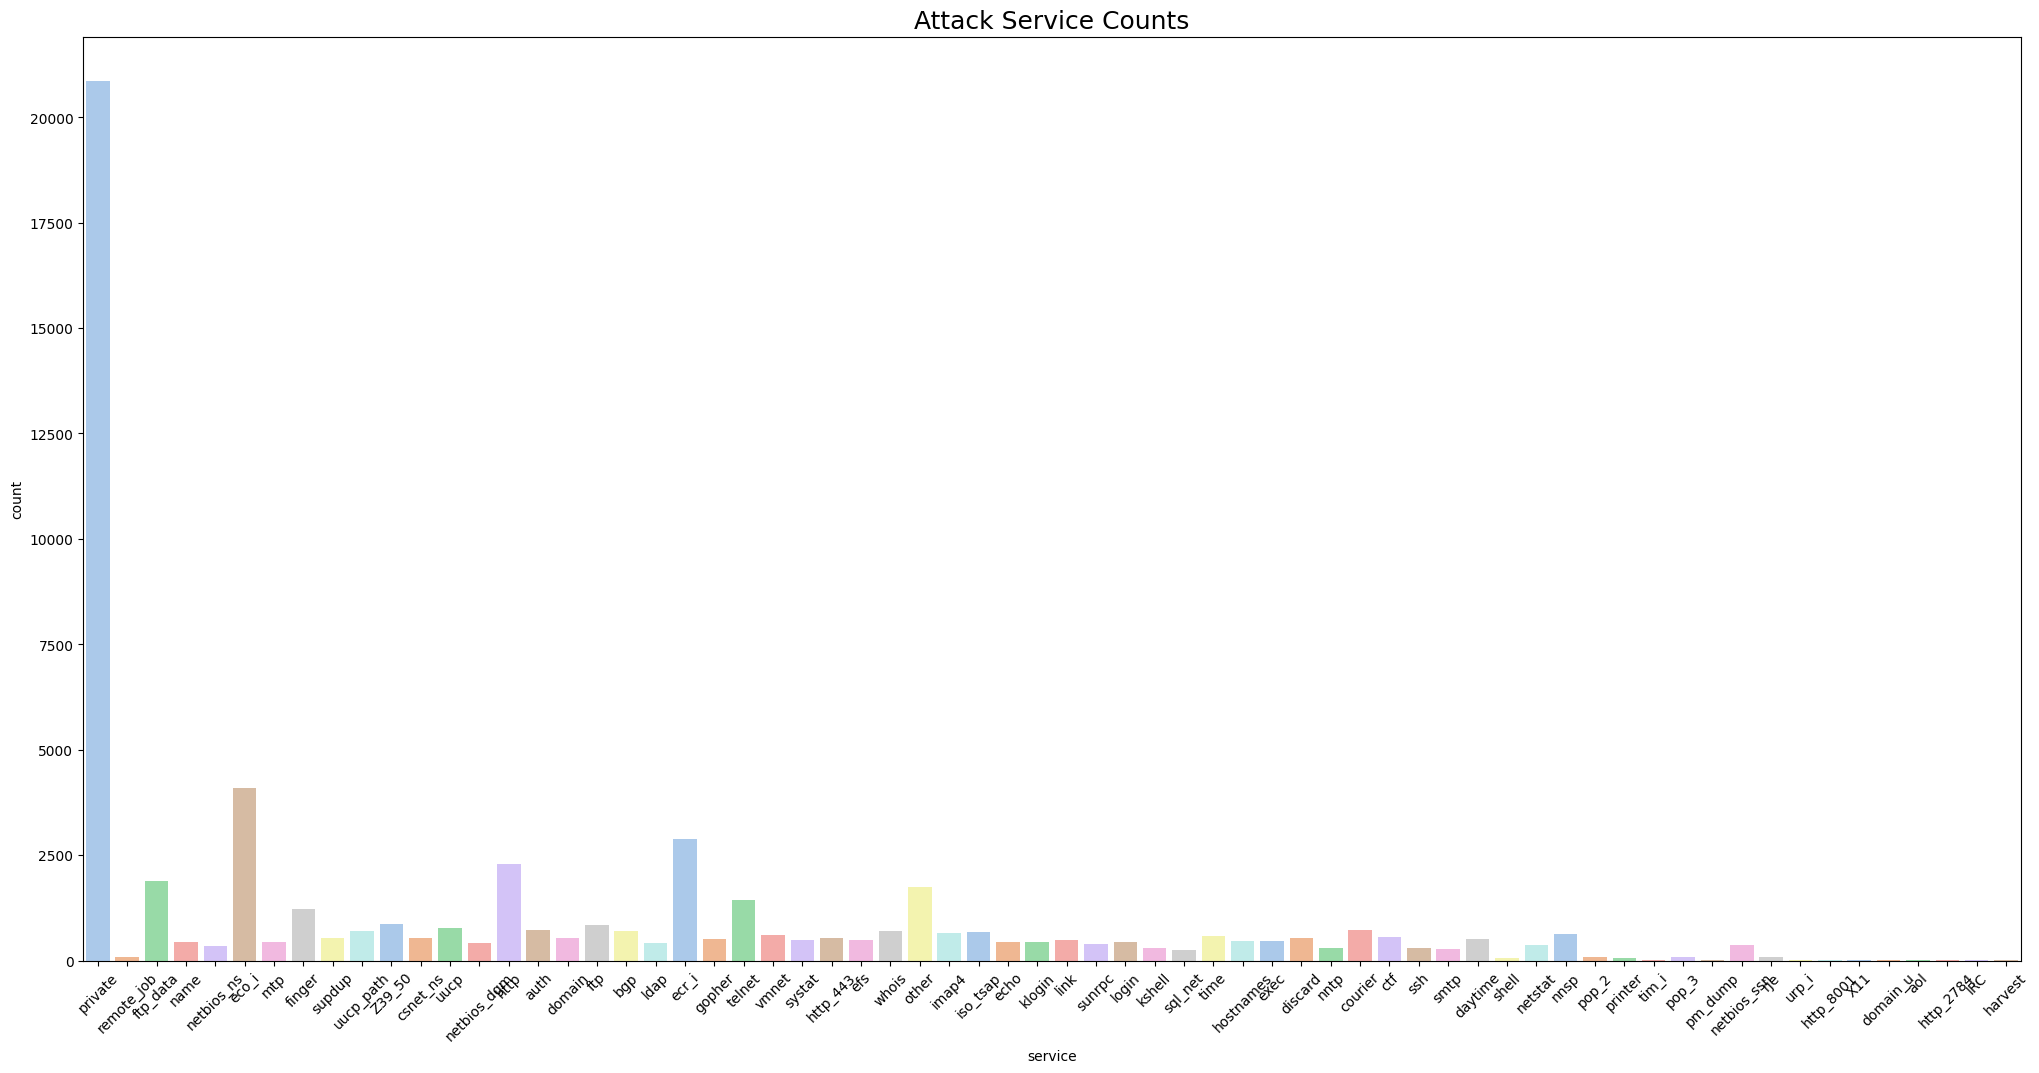

In [13]:
import seaborn as sb
import matplotlib.pyplot as mplot


mplot.figure(figsize=(25,12))

#All Data
# sb.countplot(x='service',data=dt)

#Only 'normal'
dt_onlynormal_filtered = dt[dt['attack']=='normal']
# sb.countplot(x='service',data=dt_onlynormal_filtered)
          
#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
sb.countplot(x='service',data=dt_normal_filtered, hue='service',palette='pastel')

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='pastel')

mplot.xticks(rotation=45)
mplot.title('Attack Service Counts',fontdict={'fontsize':18})
mplot.show()

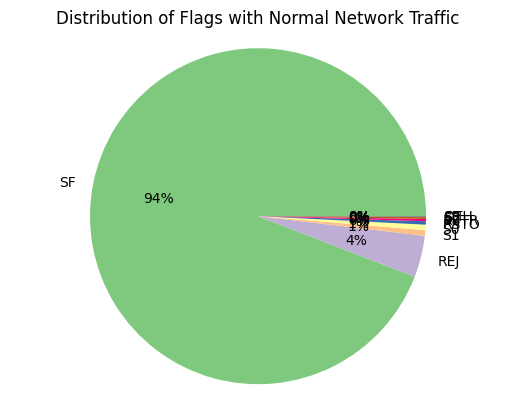

In [14]:
import pandas as pd
import numpy as np

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])


data = pd.Series(dt.loc[dt['attack']=='normal'].flag.value_counts())


# print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.0f%%', startangle=0, colors=mplot.cm.Accent(np.arange(len(data))))
mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Flags with Normal Network Traffic')
mplot.show()

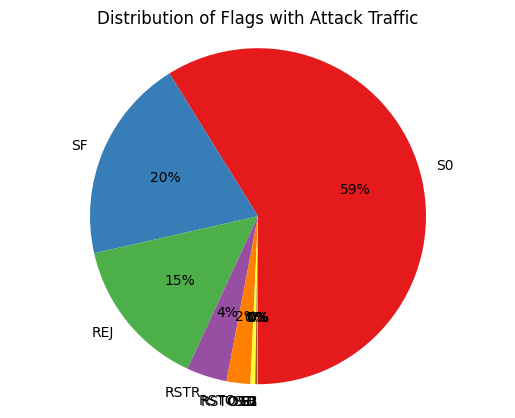

In [15]:
import pandas as pd

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])


data = pd.Series(dt.loc[dt['attack']!='normal'].flag.value_counts())

#Seaborn p deep, muted, pastel, bright, dark, and colorblind,

# print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.0f%%', startangle=270, colors=mplot.cm.Set1(np.arange(len(data))))
mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Flags with Attack Traffic')
mplot.show()

In [16]:
import re

pattern=r"_rate$"

list_dt_rates = [item for item in dt if re.search(pattern, item)]
print(list_dt_rates)

list_dtest_rates = [item2 for item2 in dtest if re.search(pattern, item2)]


# Drop any derived rate columns
dt.drop(list_dt_rates, axis=1, inplace=True)
dtest.drop(list_dtest_rates, axis=1, inplace=True)


dt.head(10)

['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,150,25,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,255,1,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,255,26,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,30,255,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,255,255,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,255,19,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,255,9,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,255,15,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,255,23,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,255,13,neptune,21


In [17]:
# Map normal traffic to 0, any attack to 1
is_attack_train = dt.attack.map(lambda a: 0 if a == 'normal' else 1)
is_attack_test = dtest.attack.map(lambda a: 0 if a == 'normal' else 1)


# dt['attack_flag'] = is_attack
attack_train=pd.DataFrame(is_attack_train)
attack_train.columns=['is_attack']

attack_test=pd.DataFrame(is_attack_test)
attack_test.columns=['is_attack']

# Dropping metadata columns for processing
# drop_list=['attack','level']
#Adding 'service' since not comparable on Accuracy
drop_list=['attack','level','service']

dt.drop(drop_list, axis=1, inplace=True)
dtest.drop(drop_list, axis=1, inplace=True)


dt.head(10)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count
0,0,tcp,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,150,25
1,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,255,1
2,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,255,26
3,0,tcp,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,30,255
4,0,tcp,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,255,255
5,0,tcp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,255,19
6,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,255,9
7,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,255,15
8,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,255,23
9,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,255,13


In [18]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class>, handle_unknown='error')</class>

# Reshape the data to a 2D array (required by OneHotEncoder)
# colors_reshaped = pd.DataFrame(colors, columns=['Color'])

# Dataframe of original data
df_train=pd.DataFrame(dt)
df_test=pd.DataFrame(dtest)


# Select the columns to be one-hot encoded
# categorical_columns=['protocol_type','service','flag']
# Commenting out since causing errors in Accuracy %
categorical_columns=['protocol_type','flag']


# Define encoder options
# 'first' to drop the first category to avoid multicollinearity
# onehot_encoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore') 
onehot_encoder_train = OneHotEncoder(sparse_output=False,handle_unknown='ignore') 
onehot_encoder_test = OneHotEncoder(sparse_output=False,handle_unknown='ignore') 


# Fit and transform the selected columns
onehot_encoded_dt = onehot_encoder_train.fit_transform(dt[categorical_columns])
onehot_encoded_dtest = onehot_encoder_test.fit_transform(dtest[categorical_columns])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df_dt = pd.DataFrame(onehot_encoded_dt, columns=onehot_encoder_train.get_feature_names_out(categorical_columns))
encoded_df_dtest = pd.DataFrame(onehot_encoded_dtest, columns=onehot_encoder_test.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame (excluding the original categorical columns)
dt_encoded = pd.concat([df_train.drop(columns=categorical_columns), encoded_df_dt], axis=1)
dtest_encoded = pd.concat([df_test.drop(columns=categorical_columns), encoded_df_dtest], axis=1)

# print(encoded_df)

dt_encoded.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,150,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,255,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,255,26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,30,255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,255,255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,255,19,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,255,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,255,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,255,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,255,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

rf = RandomForestClassifier()

# rf = RandomForestClassifier(
#     n_estimators=500,
#     max_features='sqrt',
#     # criterion='entropy',
#     # min_samples_split=10,
#     max_depth=30,
#     # random_state=42
# )

rf.fit(dt_encoded, attack_train['is_attack'])


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Accuracy, Precision, and Recall

x_test = dtest_encoded
y_test = attack_test['is_attack']

y_pred = rf.predict(x_test)

#Accuracy is calculated as the proportion of correctly classified samples out of the total number of samples

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")


Accuracy: 74.4277856635912 %
Precision: 95.5177743431221 %
Recall: 57.7885139873763 %


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      9711
           1       0.96      0.58      0.72     12833

    accuracy                           0.74     22544
   macro avg       0.79      0.77      0.74     22544
weighted avg       0.82      0.74      0.74     22544



In [22]:
# Feature Importances
X=x_test.iloc[:,0:len(x_test.columns)]
# print(X)
features = pd.DataFrame(rf.feature_importances_, index=X.columns)
sorted_features=features.sort_values(by=0, ascending=False)
sorted_features.head(15)

,0
src_bytes,0.252086
dst_bytes,0.175560
flag_SF,0.133089
dst_host_srv_count,0.104399
logged_in,0.071221
count,0.067918
dst_host_count,0.048626
protocol_type_icmp,0.026716
srv_count,0.026141
flag_S0,0.019176


In [ ]:


from sklearn.model_selection import RandomizedSearchCV

param_grid = [{
    'n_estimators':[500,1000,1500],
    # 'max_features':['sqrt','log'],
#     # criterion='entropy',
#     # min_samples_split=10,
    'max_depth':[5,15,30],
#     # random_state=42
}]

grid_search = RandomizedSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=26
)

grid_search.fit(dt_encoded, attack_train['is_attack'])

/home/admin6/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
grid_search.best_score_ 

In [ ]:
grid_search.best_params_

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test.tolist(), y_pred.tolist())

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'attack']).plot()

